<a href="https://colab.research.google.com/github/memed01/DataScienceAndBigData/blob/master/Mendi_LogisticLassoKmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study

  + Principal components. 
  + Logistic Regression.
  + K-means. 
  + linear discriminant classifier
  + cross-validation. 

In [0]:
# The following piece of code will gives us the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## **Part A** <font color="blue"></font>
Donwload  `ziptrain.csv` and `ziptest.csv` datasets from  our computer, save them and upload them here as **two separate datasets** and name them `ziptrain` and `ziptest`, respectively. Explore the data in order to understand it. 

  From `ziptrain` dataset we will only select the rows corresponding to digits $2$ and $7$ and save them in a new dataset called `binar_train`, same thing in `ziptest` and call it `binar_test`.


In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
uploaded = files.upload()

Saving ziptest.csv to ziptest.csv
Saving ziptrain.csv to ziptrain.csv


In [0]:
train_data = np.loadtxt("ziptrain.csv")
test_data = np.loadtxt("ziptrain.csv") 

In [0]:
train_2=train_data[train_data[:,0]==2]
train_7=train_data[train_data[:,0]==7]

test_2=test_data[test_data[:,0]==2]
test_7=test_data[test_data[:,0]==7]

In [0]:
binar_train=np.vstack([train_2,train_7])
binar_test=np.vstack([test_2,test_7])

In [0]:
binar_train.shape

(1376, 257)

In [0]:
binar_test.shape

(1376, 257)

Lets us project binar_train onto the first two principal components and make a scatterplot of the data in the new space (two-dimensional space spanned by the frist two PCs), use a different color (or marker) for each digit.

Principal dimensionality reduction uses Singular Value Decomposition of the data to project it to a lower dimensional space.

With "StandardScaler" let us standardize the dataset’s features

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(binar_train[:,1:])
# Apply transform to both the training set and the test set.
train_img = scaler.transform(binar_train[:, 1:])
test_img = scaler.transform(binar_test[:, 1:])

In [0]:
# Labels of the training set and the test set.
train_lbl = binar_train[:, 0]
test_lbl = binar_test[:, 0]

Make an instance of the Model with two principal compnents, an fit PCA to the training set

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# remove the first column (image label)
pca.fit(train_img)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
print(round(pca.explained_variance_.sum(),2),"%")

58.73 %


The first two principal components explaine 58.75% of the variance

Apply the mapping (transform) to both the training set and the test set.

In [0]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [0]:
Z = pca.transform(binar_train[:, 1:])

In [0]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

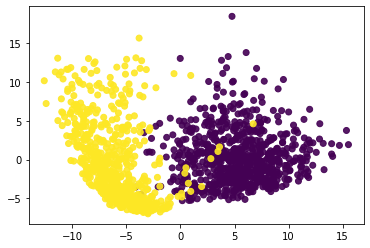

In [0]:
plt.scatter(train_img[:,0], train_img[:,1], c= train_lbl, alpha=0.9)

(-8, 20)

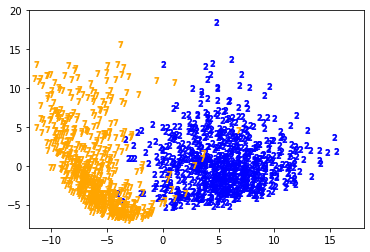

In [0]:
# Let's make it more visual
plt.scatter(train_img[train_lbl==2,0], train_img[train_lbl==2,1], marker='$2$', 
            color='blue', alpha = 0.9);

plt.scatter(train_img[train_lbl==7,0], train_img[train_lbl==7,1], marker='$7$', 
            color='orange', alpha = 0.9);

plt.xlim([-12,18])
plt.ylim([-8,20])

Fit a **logistic regression**, in the new space, to separate digits $2$ and $7$. 

In [0]:
#assigning predictor and target variables to thetraining data
Y= np.where(train_lbl==7,'1','0')
X = train_img

In [0]:
# Make sure you feed the data in the right shape  
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print(lr.intercept_)
print(lr.coef_)

[-1.21932157]
[[-1.12394667 -0.11047607]]


The model is defined as $\text{log}\Big(\frac{\pi}{1-\pi}\Big)=\theta_{0}+\theta_{1}\text{Z}{1}+\theta_{2}\text{Z}{2}$

Where $\text{Z}{1}$ and $\text{Z}{2}$ are first and second principal components

In [0]:
test_img[0].reshape(1,-1)

array([[ 8.48215265, -2.58185829]])

In [0]:
# Predict for One Observation (image)
lr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype='<U1')

In [0]:
# Predict for One Observation (image)
lr.predict(test_img[0:10])

array(['0', '1', '0', '0', '0', '0', '0', '0', '0', '0'], dtype='<U1')

Evaluate the trainded model on `binar_test` using **accuracy**, and an **appropriate F-measure**. 

In [0]:
Y_test= np.where(test_lbl==7,'1','0')
lr.score(test_img,Y_test)

0.9796511627906976

In [0]:
# Let's see how precise the predictor is
from sklearn.metrics import confusion_matrix,roc_curve, auc, roc_auc_score, f1_score
y_pred = lr.predict(test_img)
conf_matrix = confusion_matrix(Y_test, y_pred)
print('The Confusion Matrix for Logistic Regression is:','\n',conf_matrix)
#print('\n')
#false_positive_rate, true_positive_rate, thresholds = roc_curve(Y, y_pred)
#print(auc(false_positive_rate, true_positive_rate))

#print('The AUC is:', round(roc_auc_score(Y_test, y_pred)*100,1),'%')

The Confusion Matrix for Logistic Regression is: 
 [[717  14]
 [ 14 631]]


Compute the F1 score, also known as balanced F-score or F-measure

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)

In [0]:
from sklearn.metrics import f1_score

Build and print a confusion matrix for your predictions.

## **Part B**

In this part, we will generate 100 points equally distanced from $-20$ to $20$ and save them in a `numpy` array `x1` after that create $4$ more `numpy` arrays by raising `x1` to the power of $2,3,4,5$, and call them `x2`, `x3`, `x4` and `x5`, respectively. 
Create our response `y`, a new `numpy` array, defined as $y= 1.75 + 5 x_1 + 0.05 x_3 - 10.3 x_5 + \varepsilon$, where $\varepsilon \sim \mathcal{N}(0, 4)$.

Using $5$-fold cross-validation, with a reasonable train-test proportion, we will train a **lasso** regression model including all $x_1, x_2, x_3 , x_4 , x_5$, and for $10$ different  pre-determined tuning parameters. 

Plot the **cross-validated mean squared errors** vs the tuning parameter's values, and chose the best tuning parameter based on the plot

1. **<font color="blue">(1 point)</font>** Generate 100 points equally distanced from $-20$ to $20$ and save them in a `numpy` array `x1`. Now, create $4$ more `numpy` arrays by raising `x1` to the power of $2,3,4,5$, and call them `x2`, `x3`, `x4` and `x5`, respectively. 

In [0]:
import numpy as np
x1=np.linspace(-20,20,num=100)
x2=x1**2
x3=x1**3
x4=x1**4
x5=x1**5

In [0]:
np.random.seed(1)
noises = np.random.normal(0,4,100)
response_variable =1.75+ 5*x1+0.05*x3-10.3*x5+noises

In [0]:
noises.shape
response_variable.shape

(100,)

In [0]:
response_variable.shape

(100,)

In [0]:
import pandas as pd
input_df = pd.DataFrame([x1,x2,x3,x4,x5])
input_df = input_df.T
input_df.columns=['X1', 'X2', 'X3','X4','X5']

In [0]:
input_df.head()

,X1,X2,X3,X4,X5
0,-20.000000,400.000000,-8000.000000,160000.000000,-3.200000e+06
1,-19.595960,384.001632,-7524.880475,147457.253752,-2.889566e+06
2,-19.191919,368.329762,-7068.955033,135666.813773,-2.603707e+06
3,-18.787879,352.984389,-6631.827921,124597.979123,-2.340932e+06
4,-18.383838,337.965514,-6213.103384,114220.688466,-2.099815e+06


Using $5$-fold cross-validation, with a reasonable train-test proportion, train a **lasso** regression model including all $x_1, x_2, x_3 , x_4 , x_5$, and for $10$ different  pre-determined tuning parameters.

In [0]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

In [0]:
X=input_df
y=pd.DataFrame(response_variable)

In [0]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Let us choose 10 different pre-determined tuning parameters.

The `Lasso()` function has an alpha argument ($\lambda$, but with a different name!) that is used to tune the model. We'll generate an array of 10 alpha values ranging from very big to very small, essentially
covering the full range of scenarios from the null model containing
only the intercept, to the least squares fit:

In [0]:
#my_alphas = 10**np.linspace(10,-2,10)*0.5
my_alphas = np.array([0.000120,0.000169,0.000222,0.00025,0.005,0.01,0.25,0.50,0.80,1.0])
my_alphas

array([1.20e-04, 1.69e-04, 2.22e-04, 2.50e-04, 5.00e-03, 1.00e-02,
       2.50e-01, 5.00e-01, 8.00e-01, 1.00e+00])

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
Y_train =sc.fit_transform(y_train)

X_test =sc.fit_transform(X_test)
Y_test =sc.fit_transform(y_test)

In [0]:
print(np.mean(X_train,axis=0))

[ 1.42742960e-17  1.69705519e-16  5.36277372e-17  1.44328993e-16
 -8.10859316e-17]


In [0]:
print(np.var(X_train,axis=0))

[1. 1. 1. 1. 1.]


In [0]:
lcv = LassoCV(alphas=my_alphas,normalize=False,fit_intercept=False,random_state=0,cv=5)

In [0]:
#Let us fit the training data
lcv.fit(X_train,Y_train) 

#Average mean squared Errror for each alpha
avg_mse = np.mean(lcv.mse_path_,axis=1)
#alphas vs. MSE after cross-validation
print(pd.DataFrame({'alpha':lcv.alphas_,'MSE':avg_mse})) 

      alpha           MSE
0  1.000000  9.795136e-01
1  0.800000  6.572251e-01
2  0.500000  2.567286e-01
3  0.250000  6.418218e-02
4  0.010000  1.026940e-04
5  0.005000  2.577345e-05
6  0.000250  2.257888e-07
7  0.000222  2.002095e-07
8  0.000169  1.718759e-07
9  0.000120  1.503485e-07


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
lasso.set_params(alpha=lcv.alpha_)
lasso.fit(X_train, Y_train)
mean_squared_error(Y_test, lasso.predict(X_test))

1.0981298499819084e-06

Let us Plot the cross-validated mean squared errors vs the tuning parameter's values and chose the best tuning parameter based on the plot

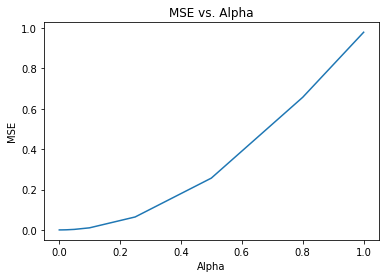

In [0]:
#cross-validated mean squared errors vs the tuning parameter sous-forme graphique
plt.plot(lcv.alphas_,avg_mse)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. Alpha')
plt.show()

In [0]:
print('The best Tuning Parameter is alpha=', lcv.alpha_)

The best Tuning Parameter is alpha= 0.00012


In [0]:
pd.Series(lasso.coef_, index=X.columns)

X1   -0.000000
X2    0.000000
X3   -0.001327
X4    0.000000
X5   -0.997703
dtype: float64

The best model Here we see that 2 of the 5 coefficient estimates are exactly zero:

## **Part C**

In this part, we will Generate $2$-dimentional data with $500$ observations from $3$ Gaussian clusters. 
Use a scatterplot to visualize the produced data. 
Shuffle the data and use $K$-means, with $K=2,3,4$ to cluster the data.
Visualize the results, separately.  


Generate $2$-dimentional data with $500$ observations from $3$ Gaussian clust

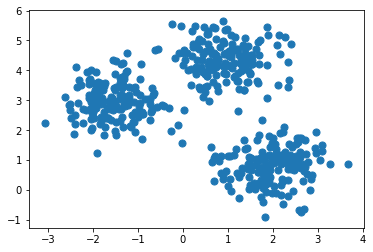

In [0]:
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=500, centers=3,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Shuffle the data and use  K -means, with  K=2,3,4  to cluster the data.

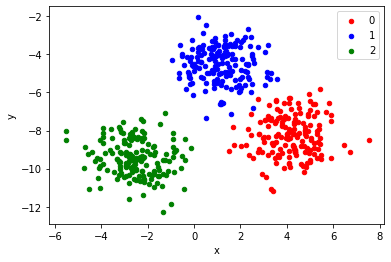

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2, shuffle=True)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

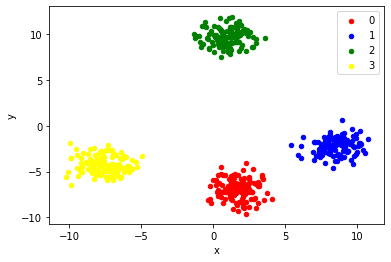

In [0]:
X, y = make_blobs(n_samples=500, centers=4, n_features=2,shuffle=True)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue',2:'green',3:'yellow'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

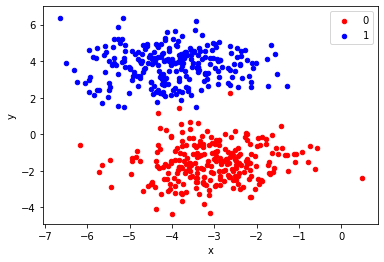

In [0]:
X, y = make_blobs(n_samples=500, centers=2, n_features=2,shuffle=True)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue',}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()